In [1]:
pip install shap


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 554.9/554.9 kB 8.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 17.5 MB/s  0:00:00m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.2/37.2 MB 26.9 MB/s  0:00:01 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [shap]2/4 [numba]te]
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import shap
import matplotlib.pyplot as plt

# Load dataset
ml_df = pd.read_csv("../data/processed/final_ml_dataset.csv")

# Encode target
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ml_df["risk_encoded"] = le.fit_transform(ml_df["risk_label"])

# Features
features = ["cases_lag1", "cases_lag2", "spatial_lag_cases"]
target = "risk_encoded"

# Temporal split (same as before)
train_df = ml_df[ml_df["year"] <= 2022]
test_df  = ml_df[ml_df["year"] > 2022]

X_train = train_df[features]
y_train = train_df[target]

X_test = test_df[features]
y_test = test_df[target]


In [3]:
from sklearn.ensemble import RandomForestClassifier

rf_spatial = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

rf_spatial.fit(X_train, y_train)


,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [4]:
explainer = shap.TreeExplainer(rf_spatial)
shap_values = explainer.shap_values(X_test)


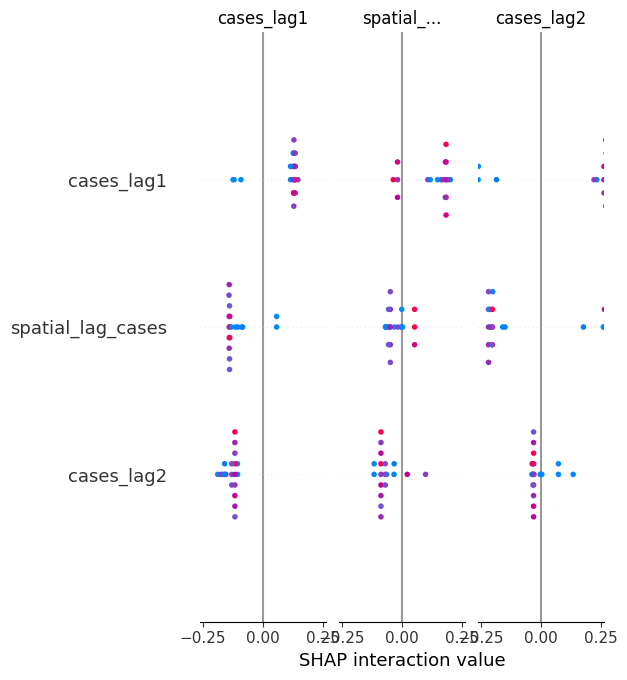

In [5]:
shap.summary_plot(
    shap_values,
    X_test,
    feature_names=features,
    show=True
)


AssertionError: Feature and SHAP matrices must have the same number of rows!

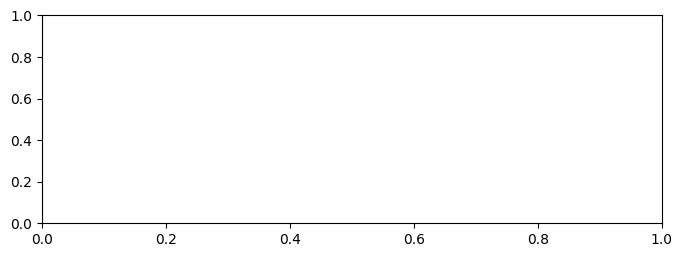

In [6]:
high_risk_index = list(le.classes_).index("High")

shap.summary_plot(
    shap_values[high_risk_index],
    X_test,
    feature_names=features,
    show=True
)


In [7]:
type(shap_values), getattr(shap_values, "shape", None)


(numpy.ndarray, (22, 3, 3))

In [8]:
import numpy as np

if isinstance(shap_values, list):
    print("List format:")
    for i, sv in enumerate(shap_values):
        print(f"Class {i} shape:", sv.shape)
else:
    print("Array format:", shap_values.shape)


Array format: (22, 3, 3)


In [13]:

high_risk_index = list(le.classes_).index("High")
shap_high = shap_values[:, :, high_risk_index]



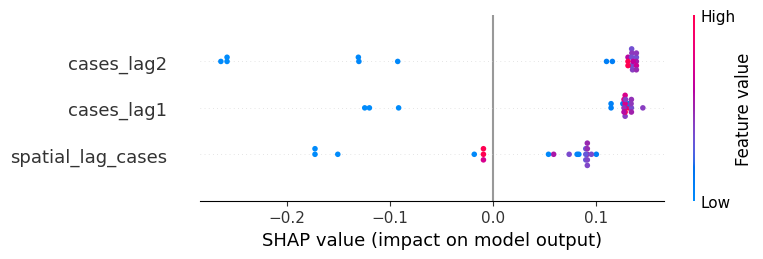

In [15]:
shap.summary_plot(
    shap_high,
    X_test,
    feature_names=features,
    show=True
)


In [16]:
import joblib

joblib.dump(rf_spatial, "../backend/model/rf_spatial.pkl")



['../backend/model/rf_spatial.pkl']